# Week 10 handin

## Exercise meanshift
1. load 'data/iris_data.csv' into a dataframe (use decimal=',') and remove the 2 `Petal` columns. Now we are left with a 2D feature space
2. get unique labels (Species column)
3. plot with a scatter plot each iris flower sample colored by label (3 different colors)
4. use: `MeanShift` and `estimate_bandwidth` from `sklearn.cluster` to first estimate bandwidth and then get the clusters (HINT: estimate_bandwidth() takes an argument: `quantile` set it to `0.2` for best result)
5. print out labels, cluster centers and number of clusters (as returned from the MeanShift function)
5. create a new scatter plot where each flower is colored according to cluster label
6. add a dot for the cluster centers
7. Compare the 2 plots (colored by actual labels vs. colored by cluster label)
8. Try changing the 'quantile' argument to 0.15 and see what happens to your cluster plot.

## Status
Everything done.

## Solution part 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import load_iris
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from itertools import cycle

Number of estimated clusters : 3
Number of estimated clusters : 6


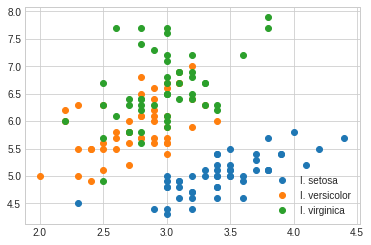

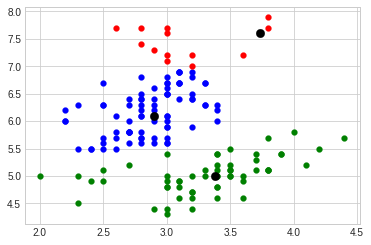

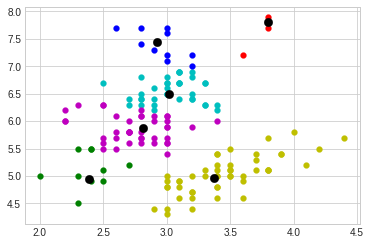

In [39]:


plt.style.use('seaborn-whitegrid')
# data
data = '../data/iris_data.csv' 

df = pd.read_csv(data, decimal=',')
df.drop(['Petal length', 'Petal width'], 'columns', inplace = True)
df['Species'].unique()

#x = df['Sepal width']
#y = df['Sepal length']

groups = df.groupby('Species')

for name, group in groups:
    plt.plot(group["Sepal width"], group["Sepal length"], marker="o", linestyle="", label=name)
plt.legend()

X = df.drop('Species', axis=1)


labels, cluster_center, n_clusters = mean_shift(X)

fig = plt.figure()
ax = fig.add_subplot(111)
colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    mask = labels == k
    maskData = X[mask]
    
    ax.scatter(maskData["Sepal width"], maskData["Sepal length"], c=col, linewidth=0.2)
    ax.scatter(cluster_center[k][1], cluster_center[k][0], c='k', s=75, linewidth=0.2)

labels, cluster_center, n_clusters = mean_shift1(X)

fig1 = plt.figure()
ax = fig1.add_subplot(111)
for k, col in zip(range(n_clusters1), colors):
    mask1 = labels1 == k
    maskData1 = X[mask1]
    
    ax.scatter(maskData1["Sepal width"], maskData1["Sepal length"], c=col, linewidth=0.2)
    ax.scatter(cluster_center1[k][1], cluster_center1[k][0], c='k', s=75, linewidth=0.2)


In [38]:
def mean_shift(data):
    bandwidth = estimate_bandwidth(data, quantile=0.20)
    
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    
    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)

    print('Number of estimated clusters : {}'.format(n_clusters))
    
    return labels, cluster_centers, n_clusters

def mean_shift1(data):
    bandwidth = estimate_bandwidth(data, quantile=0.15)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    
    labels_unique = np.unique(labels)
    n_clusters = len(labels_unique)

    print('Number of estimated clusters : {}'.format(n_clusters))
    
    return labels, cluster_centers, n_clusters

In [ ]:
data = '../data/iris_data.csv' 

df1 = pd.read_csv(data, decimal=',')

X = df1.copy()
X = X.drop('Species', axis=1)
X.drop(['Petal length', 'Petal width'], 'columns', inplace = True)
X.describe()
df1.shape
df1.sample(5)
# Normalize X

mms = MinMaxScaler()
mms.fit(X)
Xnorm = mms.transform(X)
Xnorm.shape

bandwidth = estimate_bandwidth(Xnorm, quantile=0.2) 
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(Xnorm)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)

Clustered = Xnorm.copy()
Clustered = pd.DataFrame(Clustered)
Clustered.loc[:,'Cluster'] = ms.labels_ # append labels to points
frames = [df['Species'], Clustered['Cluster']]
result = pd.concat(frames, axis = 1)
Clustered[1]
HELLYEAH = Clustered.groupby("Cluster").plot.scatter(x=Clustered[0], y=Clustered[1])
#result





## Solution part 2